# Download necessary libraries

In [1]:
# %pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Step 1: Import Libraries and Load the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("Panda: ", pd.__version__)
print("Matplotlib", matplotlib.__version__)
print("Sklearn", sklearn.__version__)


Panda:  2.2.2
Matplotlib 3.10.0
Sklearn 1.5.1


In [3]:
df = pd.read_csv('Iris.csv')

# Step 2: Explore Dataset and Drop Irrelevant Columns (e.g., 'Id')

In [4]:
print("Shape: ", df.shape)
print("---------------------------------------")
print(df.info)
print("++++++++Check Info of Dataset++++++++")
print(df.info())
print("---------------------------------------")
print("++++++++Check the datatype of each column++++++++")
print(df.dtypes)

Shape:  (150, 6)
---------------------------------------
<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2   

In [5]:
# df.describe()
df.describe(include="all")

# '''
# The describe method is used to check the statistical summery of each column to learn about the 
# distribution of data in each column.
# The statistical metrics can tell the data scientists if there are mathematical issues that may exists,
# such as extreme outliers and large deviations
# count = number of terms in the column 
# mean = average column value
# std = column standard deviation
# min = minimum value in the column
# 25%, 50%, and 75% = the boundary of each of the quartiles.
# max = maximum value in the column
# '''

'''
                                        Describe() Note: 
By default, the data frame described functions skips rows and columns that do not contain numbers. 
It is possible to make the described method work for object type columns as well. 
To enable a summary of all the columns, we could add an argument (i.e. include="all"):
                                dataframe.describe(include="all")
For the object type columns, a different set of statistics is evaluated like unique, top, and frequency. 
unique = the number of distinct objects in the column.
top = the most frequently occurring object.
frequent = the number of times the top object appears in the column. 
Some values in the table are shown here as NaN, which stands for not a number. 
This is because that particular statistical metric cannot be calculated for that specific column data type. 
Another method you can use to check your dataset is the dataframe.info function. 
'''
'''
                                        Info() Note: 
This function gives a concise summary of the data frame. This method prints information about a data frame 
including the index D type and columns non-null values, and memory usage.
'''

'\n                                        Info() Note: \nThis function gives a concise summary of the data frame. This method prints information about a data frame \nincluding the index D type and columns non-null values, and memory usage.\n'

In [6]:
df = df.drop(columns=['Id'], errors='ignore')

print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


# Step 3: Handle Missing Values (if any exist)

In [7]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Step 4: Encode Categorical Data

In [8]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
unique_values = df['Species'].unique()
print("Unique values in the 'Species' column:", unique_values)
df

Unique values in the 'Species' column: [0 1 2]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Step 5: Feature Scaling
**`iloc`** is an indexing method used to access rows and columns by position (i.e., by integer index) rather than by label.

- `:` before the comma means **select all rows**.
- `:-1` after the comma means **select all columns except the last one**.

In [9]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


# Step 6: Visualization

## 6.1. Plot the distribution of a feature (SepalLengthCm)

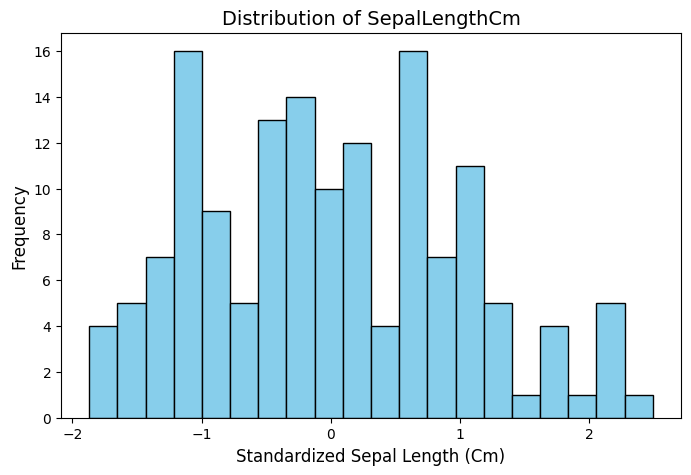

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(df['SepalLengthCm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SepalLengthCm', fontsize=14)
plt.xlabel('Standardized Sepal Length (Cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

- The histogram shows the distribution of `SepalLengthCm` values in the dataset.
- The x-axis represents the standardized values of the `SepalLengthCm` (in centimeters).
- The y-axis shows the frequency (count of occurrences) for each range of values (bins).
- The plot helps to understand the shape and spread of the `SepalLengthCm` data.

## 6.2. Scatter plot: Sepal Length vs Sepal Width

- The 150 data points (values of `SepalLengthCm`) will be distributed across these 20 bins.
- Each bin represents a range of values, and the number of data points that fall into each range will determine the height of the bars in the histogram.
  
  For example: If one of the bins covers the range from 4.5 to 4.6 cm, and 10 data points fall within this range, the bar for this bin will have a height of 10.

- So, even though you have 150 total data points, the histogram divides the data into 20 "groups" or "bins," and each bin shows how many of the 150 data points fall within its range.


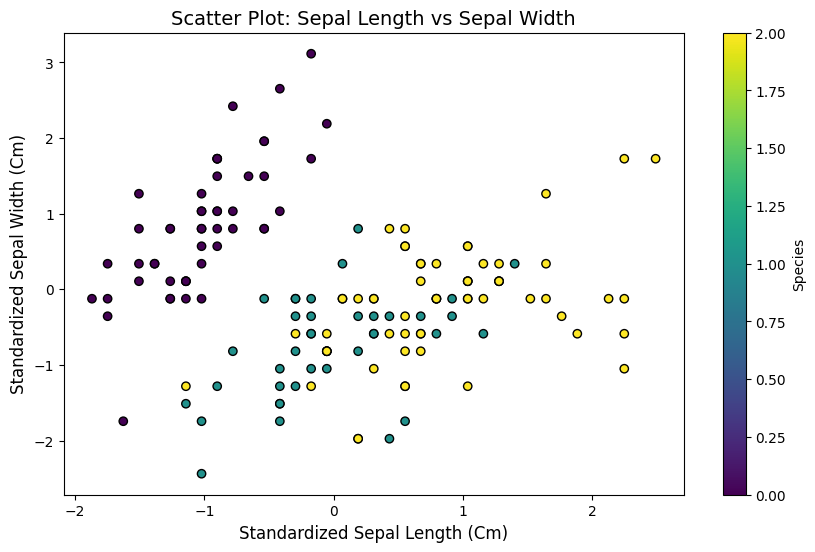

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'], cmap='viridis', edgecolor='black')
plt.title('Scatter Plot: Sepal Length vs Sepal Width', fontsize=14)
plt.xlabel('Standardized Sepal Length (Cm)', fontsize=12)
plt.ylabel('Standardized Sepal Width (Cm)', fontsize=12)
plt.colorbar(label='Species')
plt.show()

- The scatter plot shows the relationship between `SepalLengthCm` and `SepalWidthCm`.
- The x-axis represents the standardized values of `SepalLengthCm` (in centimeters).
- The y-axis represents the standardized values of `SepalWidthCm` (in centimeters).
- Each point is colored based on the `Species` column using the `viridis` colormap.
- The `colorbar` indicates the species corresponding to each color.
- The plot helps to visualize the distribution and relationship between Sepal Length and Sepal Width for different species.


## 6.3. Correlation heatmap

In [12]:
import seaborn as sns
print(sns.__version__)

0.13.2


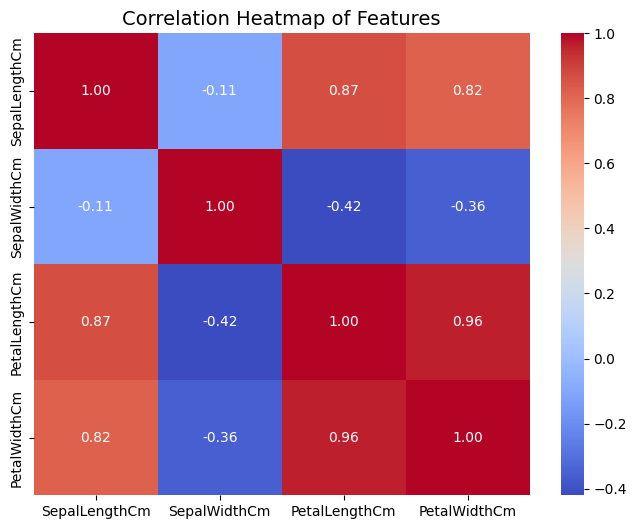

In [13]:
plt.figure(figsize=(8, 6))
feature_columns = df.drop(columns=['Species'])
correlation_matrix = feature_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.show()

**Correlation**: A statistical measure that describes the strength and direction of the relationship between two variables. It ranges from -1 to 1:
- **1**: Perfect positive correlation.
- **-1**: Perfect negative correlation.
- **0**: No correlation.

**Correlation Matrix**: A table that shows the correlation coefficients between many variables. Each cell represents the correlation between two variables.

**Heatmap**: A data visualization technique that uses color to represent values in a matrix. In the case of a correlation matrix, it visually shows the strength and direction of correlations between features.



- **`correlation_matrix = feature_columns.corr()`**: Computes the correlation matrix for the numerical feature columns.
- **`sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)`**:
  - **`sns.heatmap()`**: Plots the heatmap for the correlation matrix.
  - **`annot=True`**: Annotates the cells with correlation values.
  - **`cmap='coolwarm'`**: Uses the "coolwarm" color map to represent the correlation values (with different colors for positive and negative correlations).
  - **`fmt=".2f"`**: Formats the correlation values to two decimal places.
  - **`cbar=True`**: Displays a color bar to show the color scale.
